<a href="https://colab.research.google.com/github/Amit123456777/Simple-and-multiple-linear-regression-with-Python/blob/main/Simple_and_multiple_linear_regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# read the csv file
df = pd.read_csv('weight-height.csv')
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [4]:
# print the first 5 rows of the data set
df.head()
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [ ]:
# shape of the dataframe
df.shape
print(df)


      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [ ]:
# data type of each column
df.dtypes



Gender     object
Height    float64
Weight    float64
dtype: object

In [ ]:
# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
# number of unique values of column Gender
df.Gender.nunique()
# 2



2

In [ ]:
# unique values of column Gender
df.Gender.unique()
# array(['Male', 'Female'], dtype=object)

array(['Male', 'Female'], dtype=object)

Text(0, 0.5, 'Frequency')

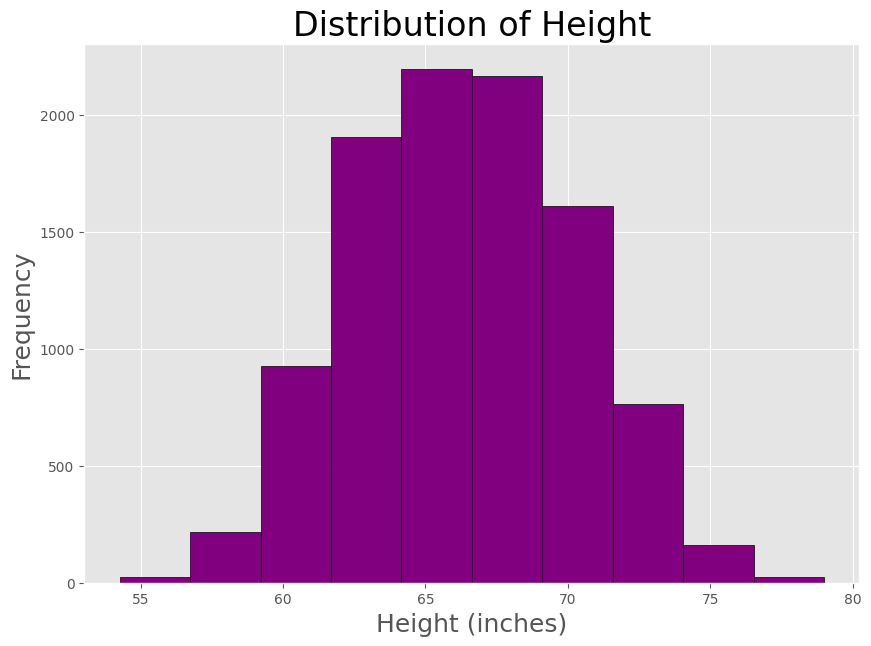

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)



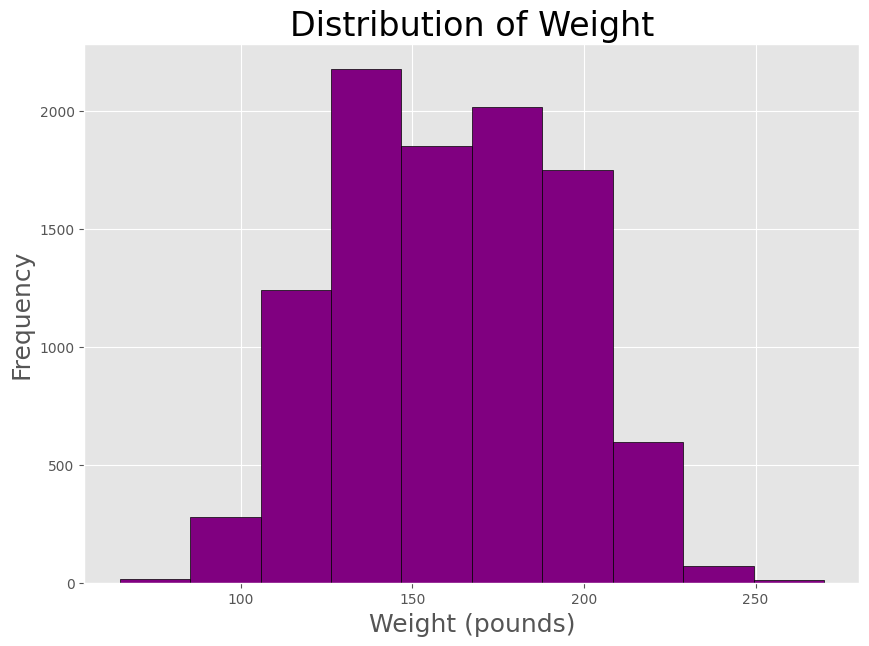

In [ ]:
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

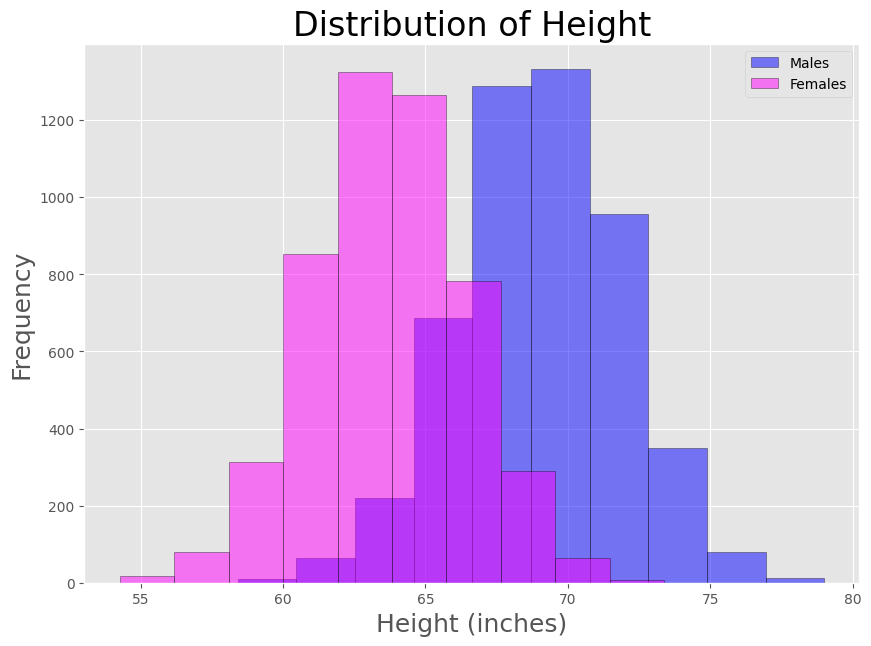

In [ ]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black',
alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

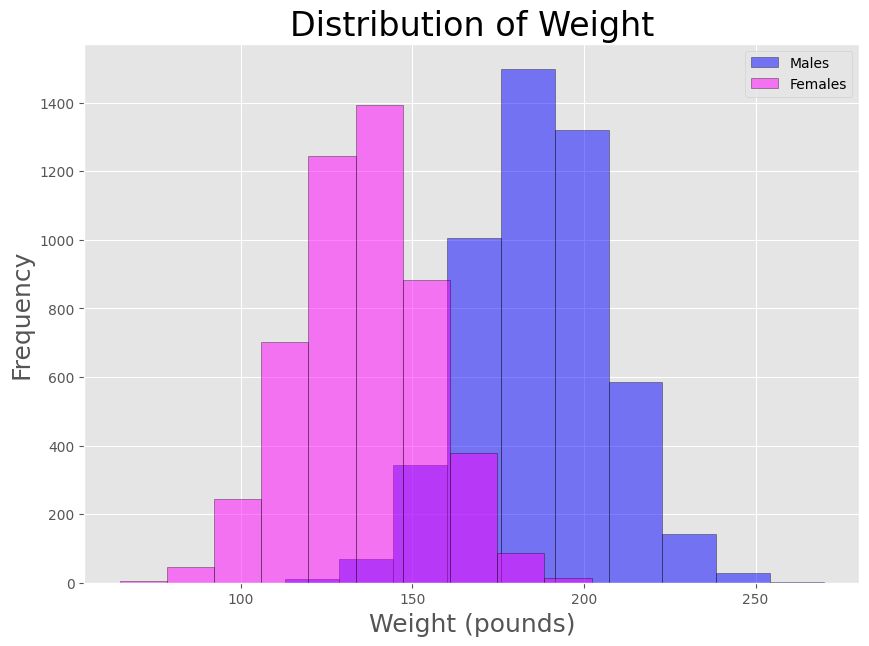

In [ ]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black',
alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [ ]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


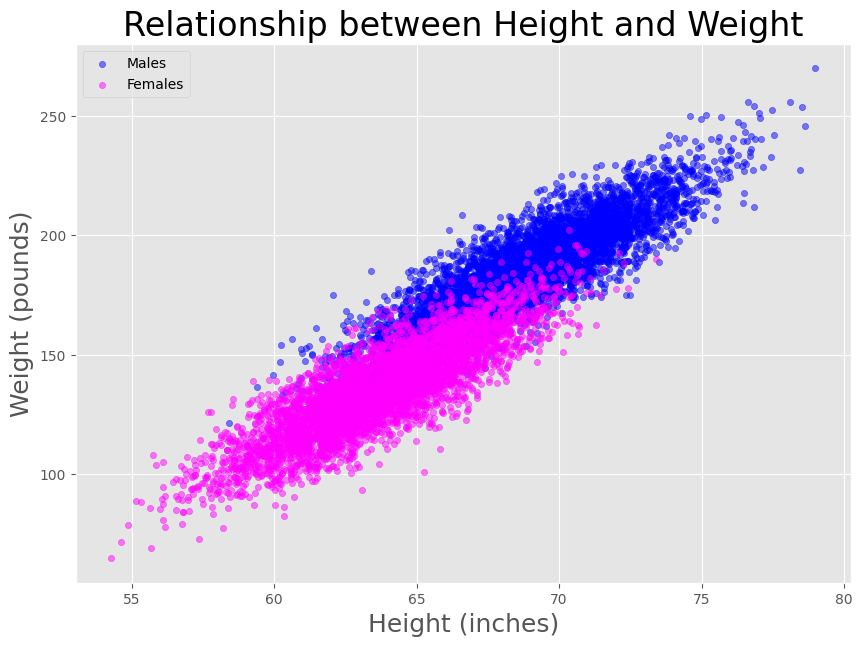

In [ ]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta',
alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

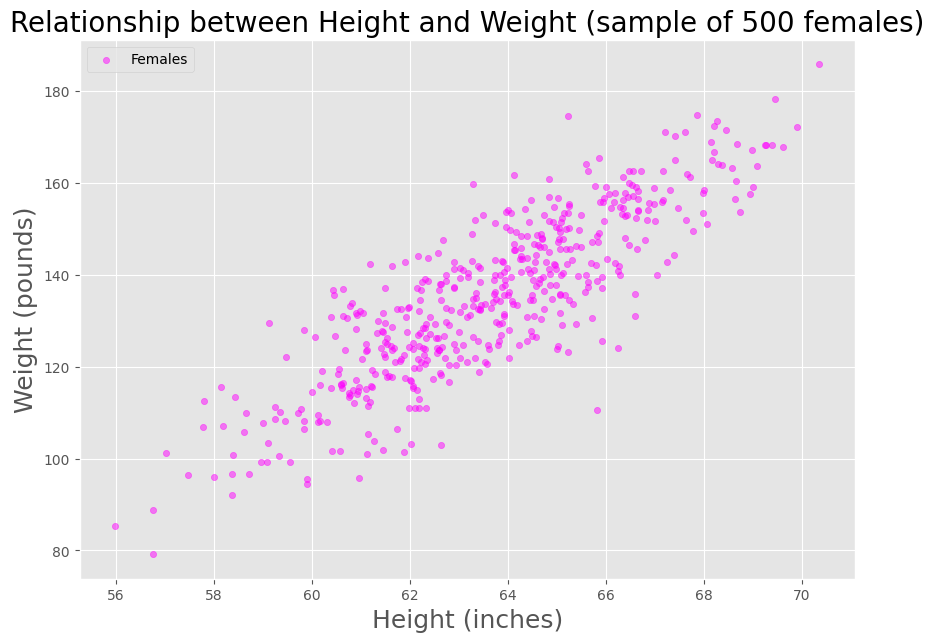

In [ ]:
# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5,
figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [ ]:
import numpy as np

# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# array([ 5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# array([ 5.99404661, -246.01326575])

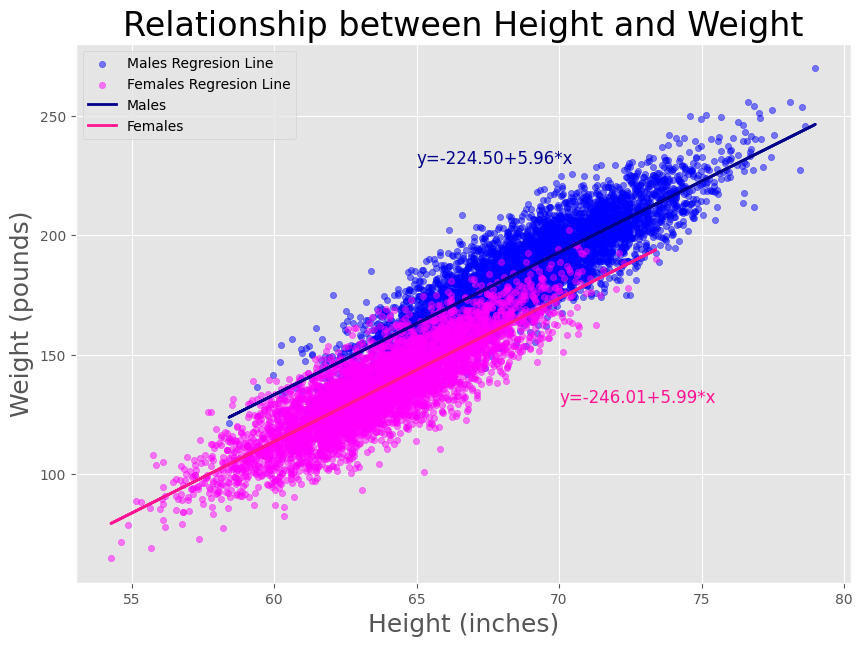

In [ ]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5,
figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=
(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue',
linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1],
color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue',
size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink',
size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

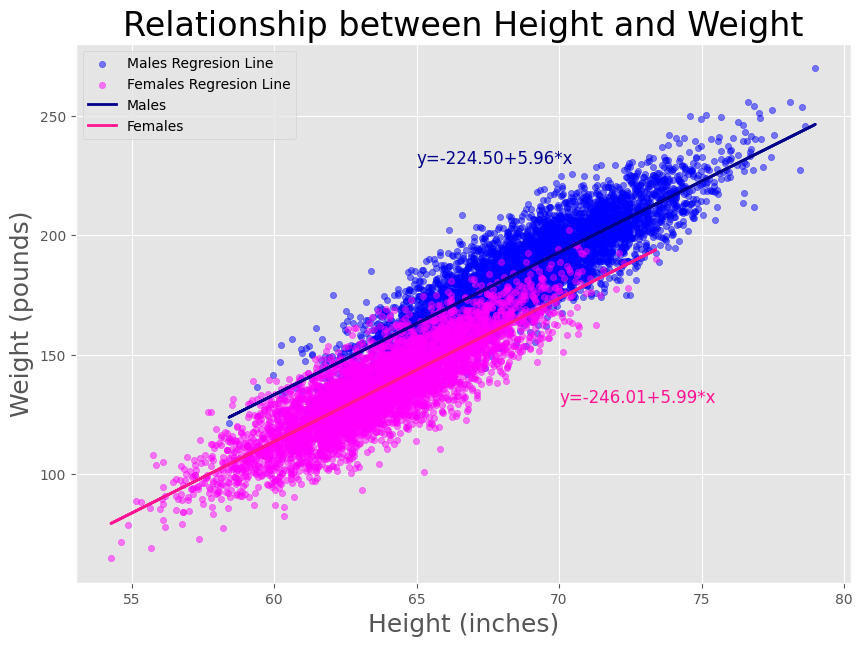

In [ ]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5,
figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=
(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue',
linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1],
color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue',
size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink',
size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

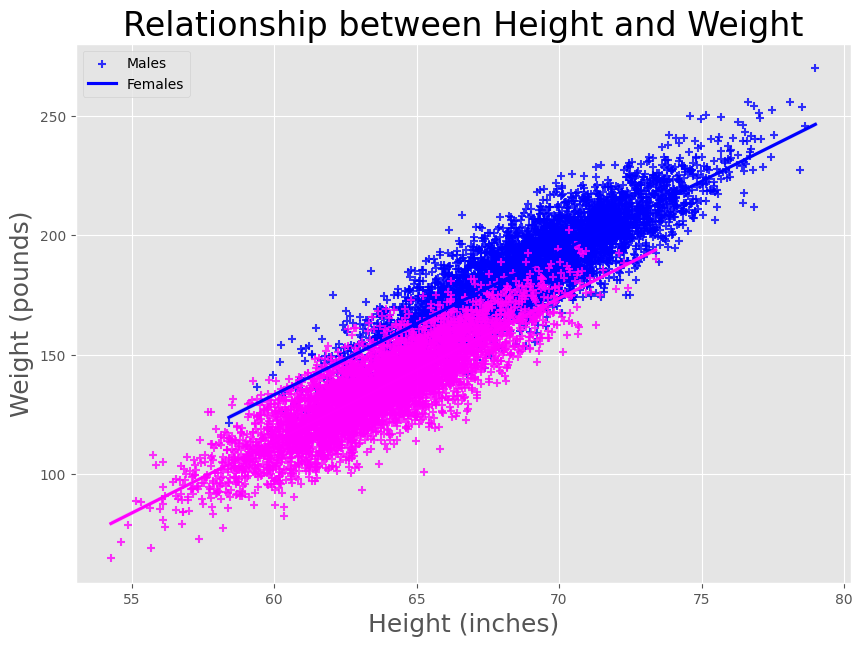

In [ ]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [ ]:
from sklearn.linear_model import LinearRegression

df_males = df[df['Gender'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])
10
# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -224.49884070545772

print(lr_males.coef_)
# 5.96177381


df_females = df[df['Gender'] == 'Female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['Height']], df_females['Weight'])

# get the slope and intercept of the line best fit
print(lr_females.intercept_)
# -246.01326574667277

print(lr_females.coef_)
# 5.99404661

-224.49884070545863
[5.96177381]
-246.01326574667254
[5.99404661]


In [ ]:
df_females = df[df['Gender'] == 'Female']

# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# predictions using numpy
print(np.polyval(female_fit, [60]))
# [113.62953114]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])

# predictions using scikit learn
print(lr_females.predict([[60]]))
# [113.62953114]

[113.62953114]
[113.62953114]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients
df_females.corr()

<ipython-input-6-e669fc110965>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_females.corr()


,Height,Weight
Height,1.000000,0.849609
Weight,0.849609,1.000000


In [7]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# correlation coefficients
df_males.corr()

<ipython-input-7-ca4ecf46fbd2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_males.corr()


,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


In [ ]:
from scipy import stats

# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
# 0.849608591418601

# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)
# 0.8629788486163176

0.8496085914186007
0.8629788486163177


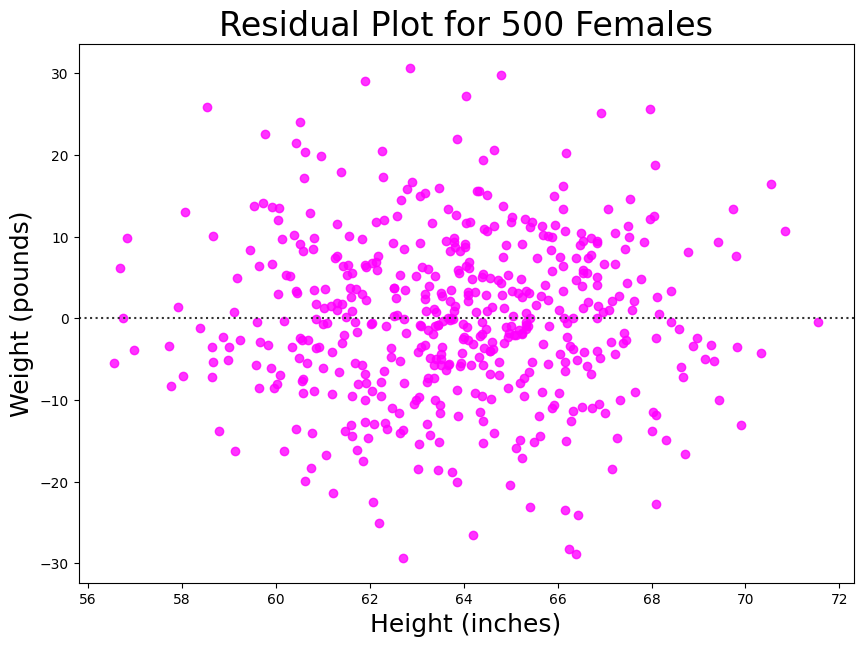

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Gender', 'Height', and 'Weight' are column names in your DataFrame (df)
# Ensure the columns have appropriate data types (numeric) for plotting

# Filter DataFrame for females and sample 500 data points
df_females = df[df['Gender'] == 'Female'].sample(500, random_state=42)  # Set a random state for reproducibility

# Create a residual plot for Height vs. Weight
fig, ax = plt.subplots(figsize=(10, 7))
sns.residplot(x='Height', y='Weight', data=df_females, color='magenta', ax=ax)

# Set title and labels
plt.title('Residual Plot for 500 Females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

# Show the plot
plt.show()


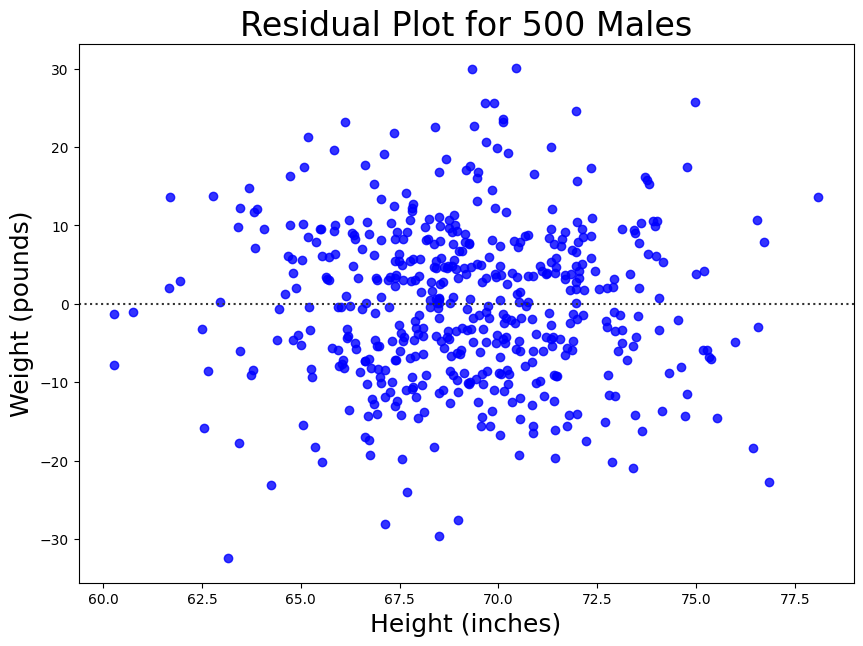

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Gender', 'Height', and 'Weight' are column names in your DataFrame (df)
# Ensure the columns have appropriate data types (numeric) for plotting

# Filter DataFrame for males and sample 500 data points
df_males = df[df['Gender'] == 'Male'].sample(500, random_state=42)  # Set a random state for reproducibility

# Create a residual plot for Height vs. Weight for males
fig, ax = plt.subplots(figsize=(10, 7))
sns.residplot(x='Height', y='Weight', data=df_males, color='blue', ax=ax)

# Set title and labels
plt.title('Residual Plot for 500 Males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

# Show the plot
plt.show()


In [17]:
import pandas as pd

# Assuming 'Gender' is a categorical column in your DataFrame
# Replace 'df' with your actual DataFrame name

# Check the data type of 'Gender'
print(df['Gender'].dtype)

# Use get_dummies to create dummy variables
df_dummy = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the first 5 rows of the modified DataFrame
df_dummy.head()


object


,Height,Weight,Gender_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
